In [33]:
import mne
import os
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
from scipy import signal

In [116]:
print(25702+750, 126255+750)

26452 127005


In [117]:
bc = np.genfromtxt('eeg_day1.csv', delimiter=',')
bc = bc[1:-1,12:20].T
bc = bc[:,26452:127005]

In [114]:
raw = mne.io.read_raw_nihon('EEG2100\FA0010QQ.EEG', preload=True)
raw.set_eeg_reference(['Cz']).pick(['Fp1', 'Fp2', 'T3', 'T4', 'O1', 'O2', 'C3', 'C4'])
print(raw.info)
raw = raw[:]
x = raw[1]
nk = raw[0]*1000
nk = nk[:,51120:259369]
nk = signal.resample(nk, bc.shape[1], axis=1)

Loading FA0010QQ.EEG
Found 21E file, reading channel names.
Reading header from e:\Aca\FYP\BraiNeoCare\EEG2100\FA0010QQ.EEG
Found PNT file, reading metadata.
Reading 0 ... 273499  =      0.000 ...   546.998 secs...
Found LOG file, reading events.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, T3, T4, O1, O2, C3, C4
 chs: 8 EEG
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2024-03-17 10:35:31 UTC
 nchan: 8
 projs: []
 sfreq: 500.0 Hz
>


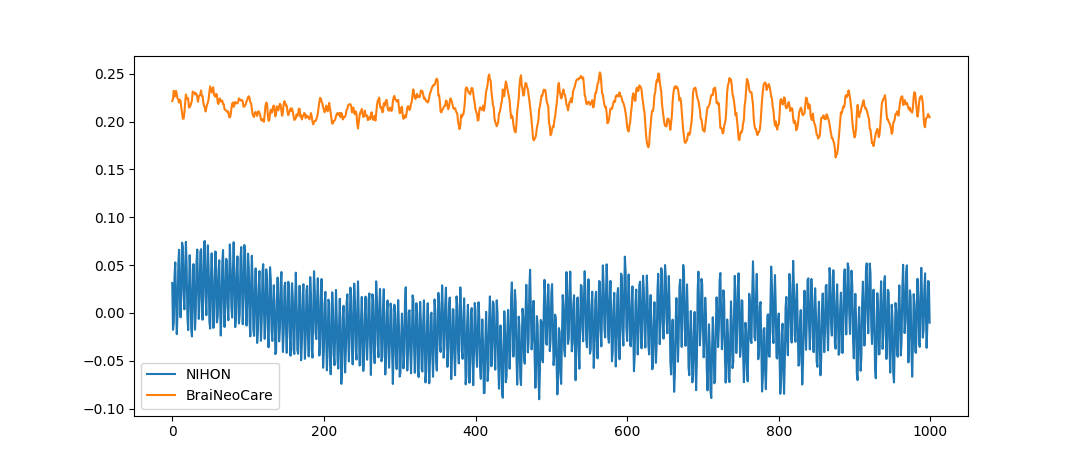

In [130]:
plt.clf()
plt.plot(np.array([nk[4][62600:63600], bc[4][62600:63600]]).T)
plt.legend(['LRH', 'BraiNeoCare'])
plt.show()

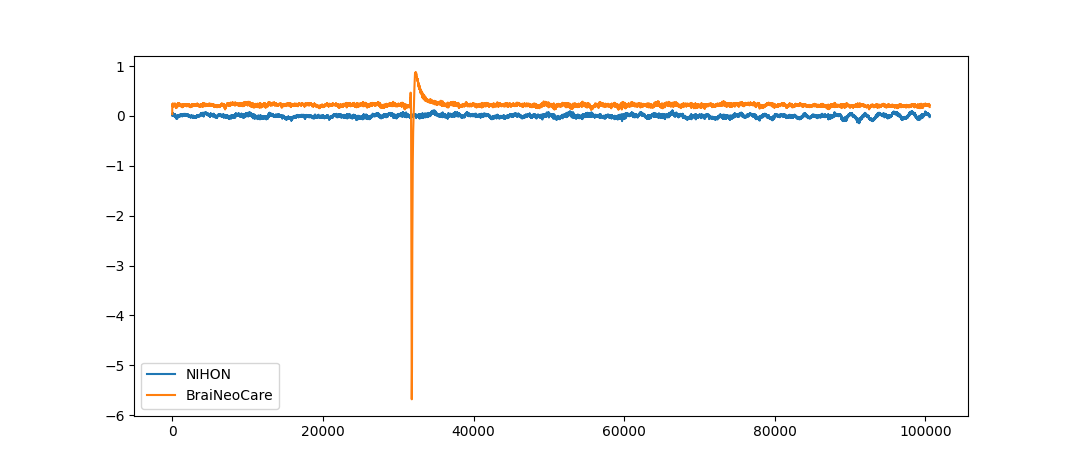

In [134]:
b1, a1 = signal.cheby2(2, 20, 70, 'lowpass', fs=250)
b2, a2 = signal.cheby2(2, 20, [48,52], 'bandstop', fs=250)

bc_filtered = signal.lfilter(b2, a2, bc[4])
bc_filtered = signal.lfilter(b1, a1, bc_filtered)
nk_filtered = signal.lfilter(b2, a2, nk[4])
nk_filtered = signal.lfilter(b1, a1, nk_filtered)

plt.clf()
plt.plot(np.array([nk_filtered, bc_filtered]).T)
plt.legend(['NIHON', 'BraiNeoCare'])
plt.show()
